# **1. Implement PCA using the cancer dataset from sklearn.datasets.**

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column (diagnosis: 0 = malignant, 1 = benign)
df['target'] = data.target

# Save to CSV file
df.to_csv('breast_cancer_data.csv', index=False)

print("Dataset saved as 'breast_cancer_data.csv' in current directory.")


Dataset saved as 'breast_cancer_data.csv' in your current directory.


In [2]:
df = pd.read_csv('/content/breast_cancer_data.csv')

In [3]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [4]:
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
scaler = StandardScaler()
X = df.drop('target', axis=1)  # Assuming 'target' is the target variable column
X_scaled = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. **Reduce** the dataset into 2 PCA components.

In [10]:
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_pca['target'] = df['target'] # Use the 'target' column from the original DataFrame (df)

In [11]:
print(df_pca.head())

       PCA1       PCA2  target
0  9.192837   1.948583       0
1  2.387802  -3.768172       0
2  5.733896  -1.075174       0
3  7.122953  10.275589       0
4  3.935302  -1.948072       0


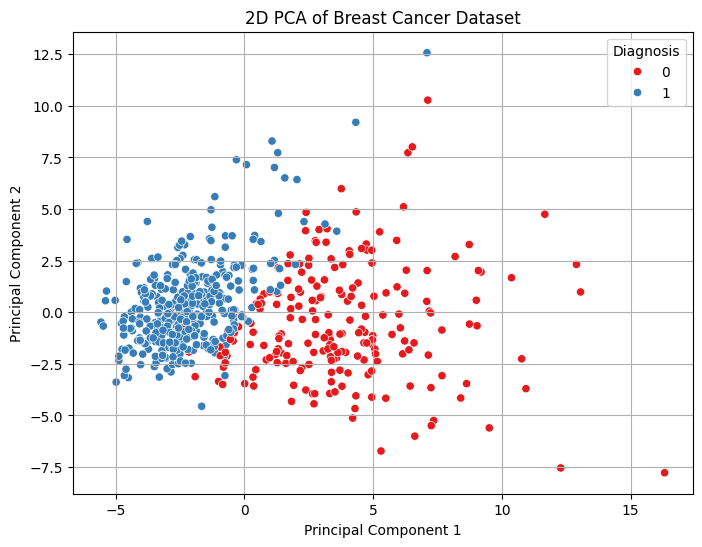

In [13]:
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_pca['target'] = df['target']
# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PCA1", y="PCA2", hue="target", palette="Set1")
plt.title("2D PCA of Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Diagnosis")
plt.grid(True)
plt.show()

# **3. Optionally, implement logistic regression for prediction to earn bonus points.**

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['target'], test_size=0.2, random_state=42)
#We need to assign the target column which is df['target']  to y

# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Assuming 'confusion_matrix' is imported from sklearn.metrics
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)


print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)


Logistic Regression Accuracy: 0.99
Confusion Matrix:
[[42  1]
 [ 0 71]]


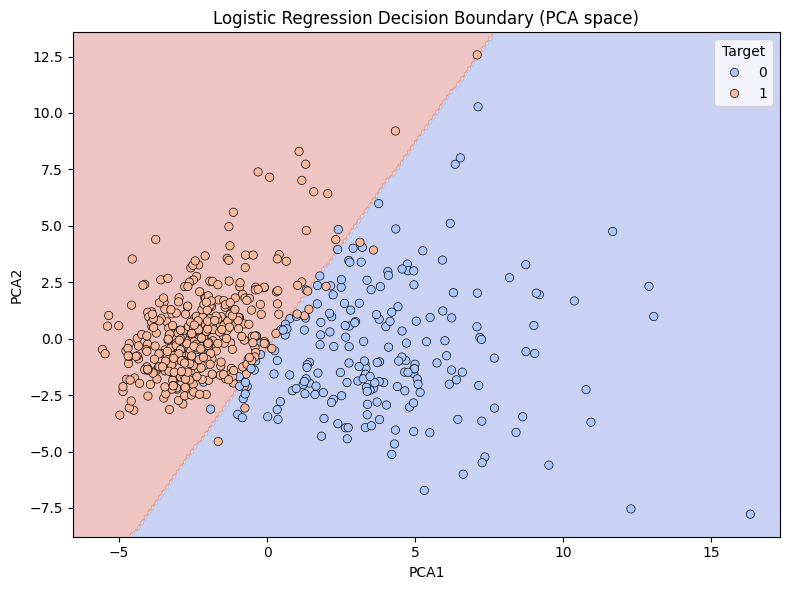

In [17]:

# Create a mesh grid based on PCA1 and PCA2
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict over the grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = logreg.predict(grid)
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
# Use df['target'] which contains all target values for the 'hue'
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['target'], palette='coolwarm', edgecolor='k')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Logistic Regression Decision Boundary (PCA space)")
plt.legend(title="Target")
plt.tight_layout()
plt.show()

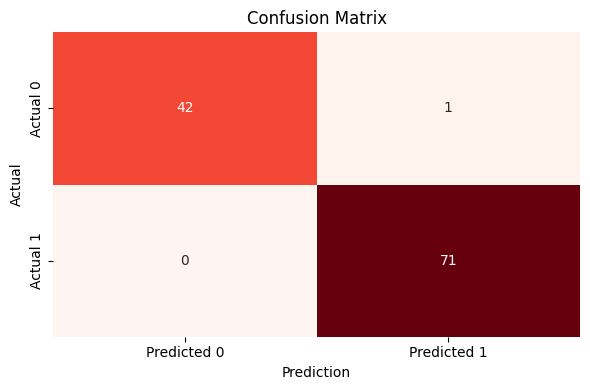

In [21]:

from sklearn.metrics import confusion_matrix

# Recomputing confusion matrix just in case
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
